# UCK 358E – Introduction to Artificial Intelligence 
## Homework 1
## Deadline: April 07, 2024




#### Name: İbrahim Enes Baloğlu
#### Student Number: 110200122

### In this homework, you will focus on predicting type of trees in a forest. There are 7 different tree types in the dataset, the label is named as "Cover_Type" and you will train models to predict the correct type for the test data. Each section below contains clear explanations about the tasks. It is not required to write a separate report for the homework. Make all of your explanations and discussions inside the Jupiter Notebook. Use the Notebook as your report. Be aware that If you deliver a Notebook containing only codes without explanation and discussion, you will lose majority of your points. 

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from scipy.special import softmax
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from collections import Counter




onehot_encoder = OneHotEncoder(sparse=False)

# Load Data (don't change anything in this part, just run it) 

In [2]:
df = pd.read_csv("datasetHW.csv")
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [3]:
df.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [4]:
df_new = df[["Elevation", "Hillshade_9am", "Horizontal_Distance_To_Hydrology", "Horizontal_Distance_To_Fire_Points", "Cover_Type"]]
X = df_new.drop(["Cover_Type" ], axis=1)
y = df_new[["Cover_Type"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # don't change random state

In [5]:
X_train

,Elevation,Hillshade_9am,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points
765,2916,202,67,1507
5927,2356,247,210,1050
14032,2977,195,696,878
6187,2415,131,108,638
3872,2299,167,497,1159
...,...,...,...,...
5191,2189,254,0,525
13418,2317,229,0,560
5390,2962,237,95,470
860,2898,204,30,1552


In [6]:
filter_col = [col for col in df if col.startswith('Soil_Type')]
X2 = df[filter_col]
y2 = df[["Cover_Type"]]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42) # don't change random state

In [7]:
X_train2

,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5927,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6187,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3872,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13418,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5390,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## <font color='red'>  In part a and part b, use (X_train, y_train) for training and (X_test, y_test) for testing your model. Don't use (X_test, y_test) during training or validation. </font>

## <font color='red'> In part c, use (X_train2, y_train2) for training and (X_test2, y_test2) for testing your model. X_train2 only contains categorical features. </font>

## Part a) you have four features to train a model. You will train linear regression and logistic regression models. You are free to use sklearn in this part 

### a1) Train linear regression model with and without normalizing your data (X_train). Try to figure out whether there is overfitting or underfitting. (Remember linear regression is for regression tasks, you need to round the prediction to use it for classification tasks) 

#### <font color='magenta'> Without Normalizing </font>

In [10]:
lr_un_nor=LinearRegression() #linear regression model
lr_un_nor.fit(X_train, y_train) #training the model 

#predicted values by rounding closest y value 
y_pred_train = np.round(lr_un_nor.predict(X_train))
y_pred_test = np.round(lr_un_nor.predict(X_test))

#flattening predictions to compare easyly
y_train_r = y_train.values.reshape(-1, 1)
y_test_r = y_test.values.reshape(-1, 1)


ac_train = accuracy_score(y_train_r, y_pred_train) #accuracy of train 
ac_test = accuracy_score(y_test_r, y_pred_test)

print("Train accuracy: ", ac_train)
print("Test accuracy: ", ac_test)

Train accuracy:  0.14162887377173092
Test accuracy:  0.1457231040564374


As you can see, the accuracy is very low. This is because the linear regression algorithm is not suitable for classification. This is why there is no difference between test and train accuracy. Below, you can observe how the model trained with non-normalized data makes predictions on the train and test data.

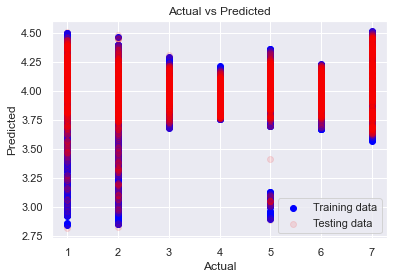

In [14]:
plt.scatter(y_train, lr_un_nor.predict(X_train), color='blue', label='Training data') #train predictions&true
plt.scatter(y_test, lr_un_nor.predict(X_test), color='red', alpha=0.1, label='Testing data') #test predictions&true

plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

By seeing the rounded versions in the confusion matrix, we can comment that the model makes a fixed prediction.

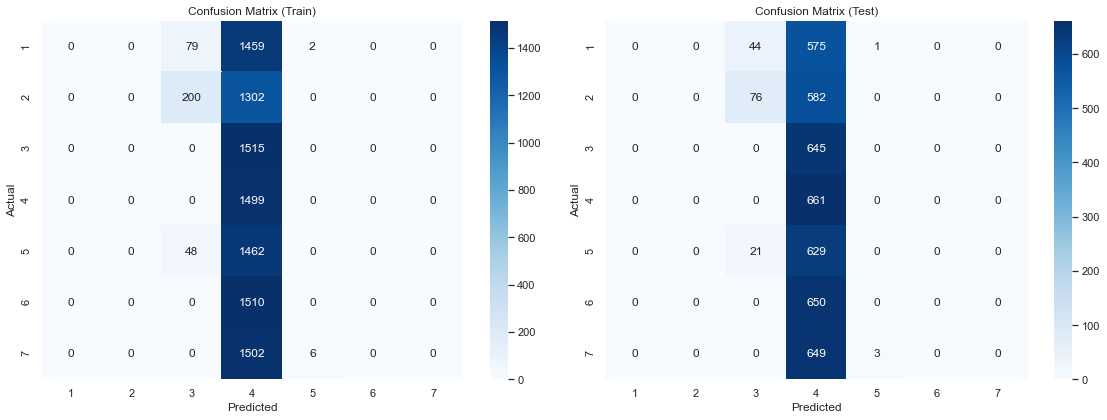

In [24]:
conf_matrix_tst = confusion_matrix(y_test, y_pred_test) #test confusion matrix
conf_matrix_tr = confusion_matrix(y_train, y_pred_train) #train confusion matrix
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
sns.heatmap(conf_matrix_tr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_train), 
            yticklabels=np.unique(y_train))
plt.title('Confusion Matrix (Train)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.subplot(1,2,2)
sns.heatmap(conf_matrix_tst, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), 
            yticklabels=np.unique(y_test))
plt.title('Confusion Matrix (Test)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


#### <font color='magenta'> With Normalizing </font>

In [28]:
scale=StandardScaler()
X_train_norm=scale.fit_transform(X_train)
X_test_norm=scale.fit_transform(X_test)


Even if another linear regression model is trained by normalizing the data, the result does not change.

In [38]:
lr_nor=LinearRegression() #linear regression model
lr_nor.fit(X_train_norm, y_train) #training the model 

#predicted values by rounding closest y value 
y_pred_train_n = np.round(lr_nor.predict(X_train_norm))
y_pred_test_n = np.round(lr_nor.predict(X_test_norm))

#flattening predictions to compare easyly
y_train_r = y_train.values.reshape(-1, 1)
y_test_r = y_test.values.reshape(-1, 1)


ac_train = accuracy_score(y_train_r, y_pred_train) #accuracy of train 
ac_test = accuracy_score(y_test_r, y_pred_test)

print("Train accuracy: ", ac_train)
print("Test accuracy: ", ac_test)

Train accuracy:  0.14162887377173092
Test accuracy:  0.1457231040564374


Below you can see the results, which are almost identical to the first model

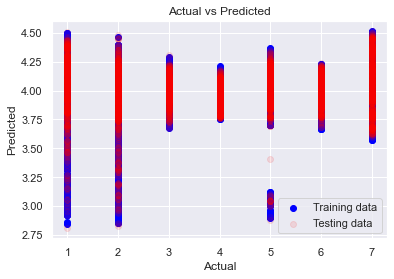

In [35]:
plt.scatter(y_train, lr_nor.predict(X_train_norm), color='blue', label='Training data') #train predictions&true
plt.scatter(y_test, lr_nor.predict(X_test_norm), color='red', alpha=0.1, label='Testing data') #test predictions&true

plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

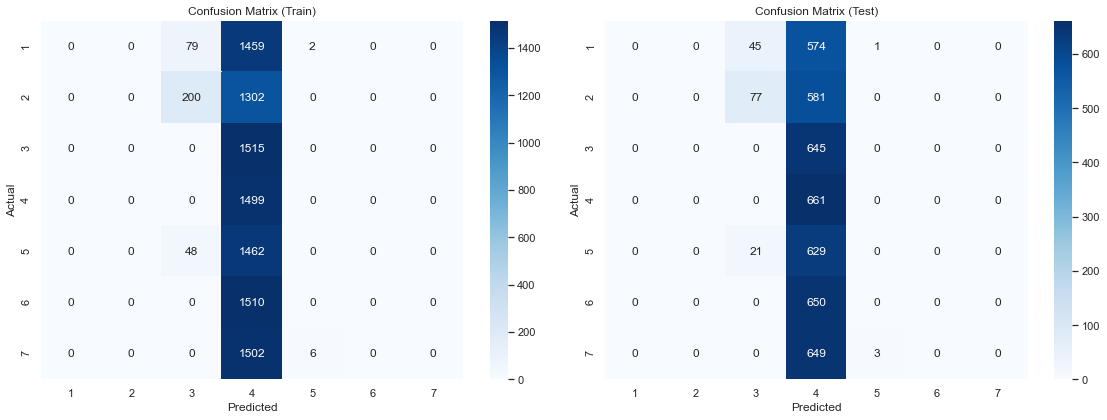

In [39]:
conf_matrix_tst = confusion_matrix(y_test, y_pred_test_n) #test confusion matrix
conf_matrix_tr = confusion_matrix(y_train, y_pred_train_n) #train confusion matrix
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
sns.heatmap(conf_matrix_tr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_train), 
            yticklabels=np.unique(y_train))
plt.title('Confusion Matrix (Train)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.subplot(1,2,2)
sns.heatmap(conf_matrix_tst, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), 
            yticklabels=np.unique(y_test))
plt.title('Confusion Matrix (Test)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

### a2) Train logistic regression model with and without normalizing your data (X_train). Try to figure out whether there is overfitting or underfitting. Also plot confusion matrix and make a discussion on it. Compare the result with part a1. 

#### <font color='magenta'> Without Normalizing </font>

In [161]:

log_r_unnor=LogisticRegression(penalty='l2',solver='newton-cg',max_iter=20000,tol=0.006)
log_r_unnor.fit(X_train,np.array(y_train).ravel())
y_pr=log_r_unnor.predict(X_test)
y_pr_tr=log_r_unnor.predict(X_train)

print("Test accuracy: ",accuracy_score(y_test,y_pr))
print("Train accuracy: ",accuracy_score(y_train,y_pr_tr))

c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Test accuracy:  0.605379188712522
Train accuracy:  0.618291761148904


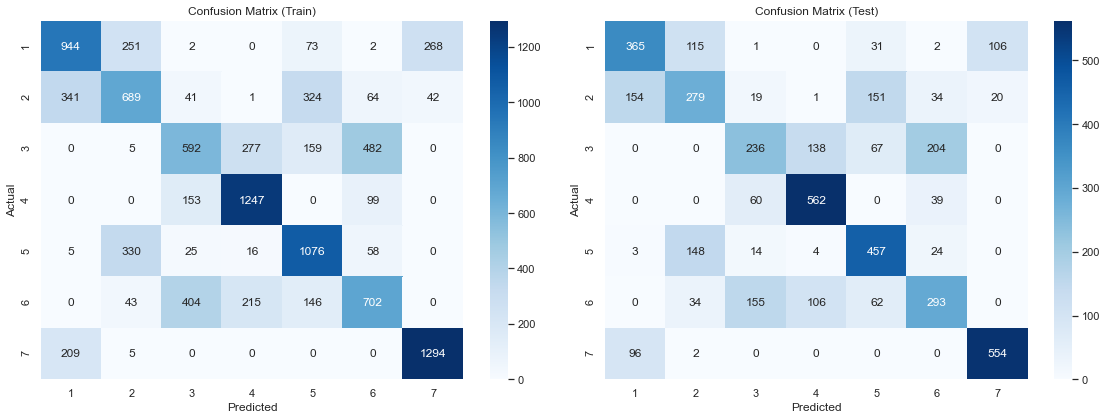

In [162]:
conf_matrix_tst = confusion_matrix(y_test, y_pr) #test confusion matrix
conf_matrix_tr = confusion_matrix(y_train, y_pr_tr) #train confusion matrix
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
sns.heatmap(conf_matrix_tr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_train), 
            yticklabels=np.unique(y_train))
plt.title('Confusion Matrix (Train)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.subplot(1,2,2)
sns.heatmap(conf_matrix_tst, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), 
            yticklabels=np.unique(y_test))
plt.title('Confusion Matrix (Test)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

#### <font color='magenta'> With Normalizing </font>

In [163]:
log_r_nor=LogisticRegression(penalty='l2',solver='newton-cg',max_iter=20000,tol=0.006)
log_r_nor.fit(X_train_norm,np.array(y_train).ravel())

y_pr=log_r_nor.predict(X_test_norm)
y_pr_tr=log_r_nor.predict(X_train_norm)

print("Test accuracy: ",accuracy_score(y_test,y_pr))
print("Train accuracy: ",accuracy_score(y_train,y_pr_tr))

Test accuracy:  0.605379188712522
Train accuracy:  0.6172524565381708


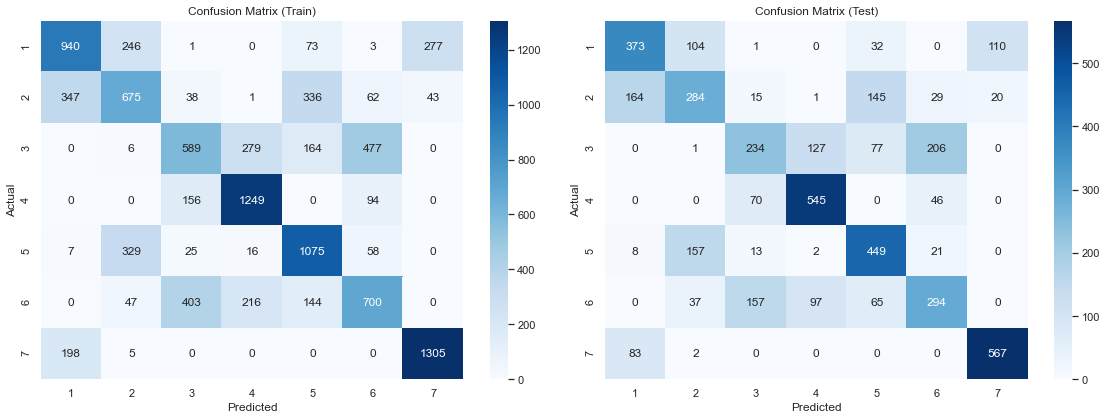

In [164]:
conf_matrix_tst = confusion_matrix(y_test, y_pr) #test confusion matrix
conf_matrix_tr = confusion_matrix(y_train, y_pr_tr) #train confusion matrix
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
sns.heatmap(conf_matrix_tr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_train), 
            yticklabels=np.unique(y_train))
plt.title('Confusion Matrix (Train)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.subplot(1,2,2)
sns.heatmap(conf_matrix_tst, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), 
            yticklabels=np.unique(y_test))
plt.title('Confusion Matrix (Test)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

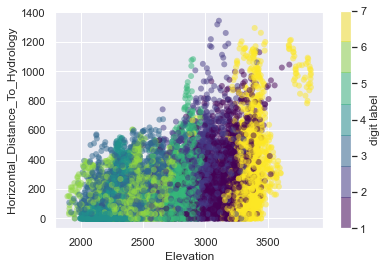

In [166]:
plt.scatter(X_train["Elevation"], X_train["Horizontal_Distance_To_Hydrology"], c=y_train.values.ravel(),
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('viridis', 7))
plt.colorbar(label='digit label', ticks=range(8))
plt.xlabel('Elevation')
plt.ylabel('Horizontal_Distance_To_Hydrology')
plt.show()

Since logistic regression uses a probabilistic method when determining the boundary condition, it only has problems with the time it takes to train the model in non-normalized data. Other than that, there is almost no difference between the two methods. In addition, both models are very close to each other in terms of train accuracy and test accuracy. This situation is an indication of not being able to generalize completely rather than an overfitting in the model. When we look at the confusion matrix, we see that some classes such as 7 are predicted quite well. This situation proves to us that those data are separated from the others by more distinct boundaries, as can be seen from the plot just above. Logistic regression, which is a method that sets probabilistic limits, can make more accurate predictions.

### a3) You only have access to four features (as presented in X_train). What are you suggesting to improve the logistic regression's model accuracy? Implement the proposed approach and compare the result with part a2

## Part b) Again you have four features to train a model. You will train linear regression and logistic regression models. But, in this time, you need to develop your algorithm from scratch without using a library such as sklearn. (You can benefit from the codes available in ninova)

### b1) Implement linear regression and logistic regression from scratch and train models for your problem. Give comments in each line of your algorithms to explain what is this line for. Compare your result with a1, a2. 

#### <font color='green'> Linear Regression (Normal Equation) </font>

$$
\mathbf{B} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}_{\text{oh}}
$$


I wrote the linear regression algorithm using the normal equation due to the low processing and time burden. I wrote the linear regression algorithm using the normal equation due to the low processing and time burden. After training and testing the model, I achieved the same test accuracy as Sklearn's algorithm.

In [101]:
class LinearRegressionNeq:
    def __init__(self) -> None:
        self.__B = np.array([]) #coefficient array

    def train(self, X, y):
        X=np.array(X)
        y=np.array(y)
        # one hot encoding 
        classes = np.unique(y)
        class_labels = {c: i for i, c in enumerate(classes)}
        y_oh=np.eye(len(classes))[np.vectorize(lambda c: class_labels[c])(y).reshape(-1)]
        # implementing normal equation
        self.__B = np.linalg.inv(np.dot(np.array(X).T, np.array(X))).dot(np.array(X).T).dot(np.array(y_oh))

    def predict(self, X):
        X=np.array(X)
        
        y=np.dot(np.array(X),self.__B)
        y_pred=np.zeros(np.shape(y)[0])
        for i in range(len(y)):
            y_pred[i]=np.argmax(y[0])+1     
        return y_pred
    
lr_neq=LinearRegressionNeq()
lr_neq.train(X_train,y_train)

In [102]:
preds=lr_neq.predict(X_test)
print(accuracy_score(y_test,preds))

0.1457231040564374


#### <font color='green'> Logistic Regression </font>

The logistic regression algorithm was implemented using softmax instead of sigmoid, which is more suitable for binary classification, in order to better distinguish multiclass tree labels.

In [170]:
class MulticlassLogisticRegression:
    def fit(self, X, Y):
        self.loss_steps, self.W = self.gradient_descent(X, Y)

    def loss_plot(self):
        return self.loss_steps.plot(
            x='step', 
            y='loss',
            xlabel='step',
            ylabel='loss'
        )

    def predict(self, H):
        Z = - H @ self.W  #make prediction
        P = softmax(Z, axis=1) # writing as a probability matrix
        return np.argmax(P, axis=1)+1 #maximum probability index + 1 (avoid array index confusion)
    def loss(self,X, Y, W):
        
        Z = - X @ W #make prediction
        N = X.shape[0] #number of rows
        loss = 1/N * (np.trace(X @ W @ Y.T) + np.sum(np.log(np.sum(np.exp(Z), axis=1)))) #loss function
        return loss
    def gradient(self,X, Y, W, mu):
        Z = - X @ W #make prediction
        P = softmax(Z, axis=1) # writing as a probability matrix
        N = X.shape[0]
        gd = 1/N * (X.T @ (Y - P)) + 2 * mu * W #gradient function (derivative of loss)
        return gd
    def gradient_descent(self,X, Y, max_iter=1000, eta=0.1, mu=0.01):
        Y_onehot = onehot_encoder.fit_transform(Y.reshape(-1,1)) #one hot encoding
        W = np.zeros((X.shape[1], Y_onehot.shape[1])) #weight matriz initialization
        step = 0
        step_lst = [] 
        loss_lst = []
        W_lst = []
        #gradient descent alghoritm
        while step < max_iter:
            step += 1
            W -= eta * self.gradient(X, Y_onehot, W, mu)
            step_lst.append(step)
            W_lst.append(W)
            loss_lst.append(self.loss(X, Y_onehot, W))

        df = pd.DataFrame({
            'step': step_lst, 
            'loss': loss_lst
        })
        return df, W

In [177]:
model = MulticlassLogisticRegression()
model.fit(X_train_norm,np.array(y_train))


<AxesSubplot:xlabel='step', ylabel='loss'>

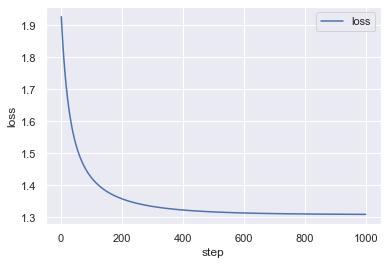

In [178]:
# plot loss
model.loss_plot()

In [172]:
print(accuracy_score(np.array(y_test),model.predict(X_test_norm)))

0.43738977072310403


### b2) Try to figure out why the model accuracies of linear regression and logistic regression are too different by analyzing your code. And emphasize the main assumption and corresponding line in your code that lead to performance change. 

Similar to linear regression, softmax, which is a probabilistic function for multi-class structure, was additionally used in the logistic regression algorithm, where the weights are multiplied by the data containing the features. This allows determining a probability-based limit between features and making a prediction for the highest label.

In my opinion, the parts that meet these conditions are the parts where we use softmax and then try to reduce the loss values ​​as much as possible with gradient descent. In this way, the most appropriate probability functions could be created and classified according to the defined loss function.

## Part c) This time, you have a different dataset with categorical features to train a model (X_train2, y_train2). You need to write decision tree algorithm that we presented in the lecture from scratch without using any library.  

### c1) Implement decision tree algorithm (with categorical features (C4.5)) from scratch and train a model for your problem. Give comments in each line of your algorithm to explain what is this line for. Train a model and present your result on test set. Try to figure out whether there is overfitting or underfitting. Plot feature importance for your model.

The desicion tree algorithm is implemented based on the entropy calculation formula and the information gain calculation function that uses it.

In [111]:
class Node:
    def __init__(self,feature=None,treshold=None,go_left=None,go_right=None,gain=None,value=None):
        self.feature=feature
        self.treshold=treshold
        self.go_left=go_left
        self.go_right=go_right
        self.gain=gain
        self.value=value
class DesicionTree:
    def __init__(self,min_samples_split=2,max_depth=3):
        #root of tree
        self.root=None

        #stop conditions
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
    
    def _entropy(self,a):
        #number of feature types
        counts=np.bincount(a)
        #percentages of each feature
        percentage=counts/len(a)
        ent=0
        #entropy calculation
        for i in percentage:
            if i >0:
                ent+=-i*np.log2(i)
        return ent
    def _information_gain(self,parent,left_child,right_child):
        #split rates of childs 
        rate_left=len(left_child)/len(parent)
        rate_right=len(right_child)/len(parent)

        #information gain calculation
        return self._entropy(parent)-rate_left*self._entropy(left_child)-rate_right*self._entropy(right_child)
    def _best_split(self,X,y):
        best_split={}
        best_info_gain=-1
        n_rows, n_cols=X.shape

        #for every feature of the dataset
        for i in range(n_cols):
            #choose each column's all rows
            X_col=X[:,i]
            for treshold in np.unique(X_col): #treshold value for each unique value on corresponding feature 
                df=np.concatenate((X,y.reshape(-1,1)),axis=1) #x and y combined 
                #data splitted according to treshold
                df_left=np.array([row for row in df if row[i]<= treshold]) 
                df_right=np.array([row for row in df if row[i] > treshold])
                # by calculating the information gain seleceted best split conditions
                if len(df_left)>0 and len(df_right)>0:
                    #extract y values
                    y=df[:,-1]
                    y_left=df_left[:,-1]
                    y_right=df_right[:,-1]
                    gain=self._information_gain(y,y_left,y_right)
                    if gain>best_info_gain:
                        best_split={
                            'feature_index':i,
                            'treshold':treshold,
                            'df_left':df_left,
                            'df_right':df_right,
                            'gain':gain
                        }
                        best_info_gain=gain
        return best_split
    def _build(self,X,y,depth=0):
        n_row,self.n_col=X.shape

        if n_row>=self.min_samples_split and depth<=self.max_depth:
            best=self._best_split(X,y)
            if best:    
                if best['gain']>0:
                    left=self._build(
                        X=best["df_left"][:,:-1],
                        y=best["df_left"][:,-1],
                        depth=depth+1
                    )
                    right=self._build(
                        X=best["df_right"][:,:-1],
                        y=best["df_right"][:,-1],
                        depth=depth+1
                    )
                    return Node(feature=best['feature_index'],treshold=best['treshold'],go_left=left,go_right=right,gain=best['gain'])
        return Node(value=Counter(y).most_common(1)[0][0])
    def _fit(self,X,y):
        self.root=self._build(X,y) #desicion tree building
        self.feature_imp= self._calculate_feature_importance(self.root) #feature importance
    def _predict(self,x,tree):
        if tree.value !=None:
            return tree.value
        feature_value=x[tree.feature] #value of test set corresponding feature
        #to predict the label moving on tree right or left
        if feature_value <= tree.treshold:
            return self._predict(x=x, tree=tree.go_left)
        if feature_value > tree.treshold:
            return self._predict(x=x, tree=tree.go_right)
        
    def predict(self,X):
        #predicting all rows
        return [self._predict(x,self.root) for x in X]
    
    def _calculate_feature_importance(self, tree):
        #initializing importance of features
        importance = np.zeros(self.n_col)

        def dfs(node, imp):
            #for empty nodes
            if node is None:
                return
            if node.go_left is None and node.go_right is None:
                return
            #updateing importance using gain of node
            imp[node.feature] += node.gain
            #going down to the branches to scan all tree
            dfs(node.go_left, imp)
            dfs(node.go_right, imp)

        dfs(tree, importance)
        #normalized importaance values
        return importance / np.sum(importance)    





Below, an attempt is made to reach the optimum value of the maximum tree depth by using the grid search algorithm. As a result, as can be seen from the graph, the maximum accuracy value that can be obtained for the x_train2 data set has been reached. This shows us that the data features we have are not enough for the algorithm to make a full discrimination.

In [173]:
import itertools

#created grid for hyperparamters
param_grid = {
    'max_depth': [3,7,11,13,17,19,25,27,33,37],
}

# all combinations of hyperparameters
param_combinations = list(itertools.product(*param_grid.values()))


best_score = float('-inf')
best_params = None
scores=[] #test scores
scores_t=[] #train scores
#grid search
for params in param_combinations:
    #current hyperparameter value
    m_d = params
    #model training and testing
    model = DesicionTree(max_depth=m_d[0]) 
    model._fit(np.array(X_train2), np.array(y_train2))
    pred_train=model.predict(np.array(X_train2))
    pred_test=model.predict(np.array(X_test2))
    score_t = accuracy_score(y_train2,pred_train) 
    scores_t.append(score_t)
    score = accuracy_score(y_test2,pred_test) 
    scores.append(score)
    #choosing best score and best hyperparameters for test set
    if score > best_score:
        best_score = score
        best_params = params


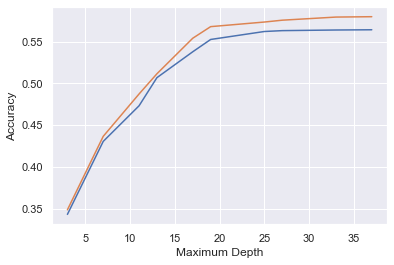

Best Hyperparameters: (37,)
Best Score: 0.5798059964726632


In [174]:
#train and test accuracies plot to see the overfitting
max_d=[3,7,11,13,17,19,25,27,33,37]        
plt.plot(max_d,scores_t,label='Training Score')
plt.plot(max_d,scores,label='Test Score')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.show()
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

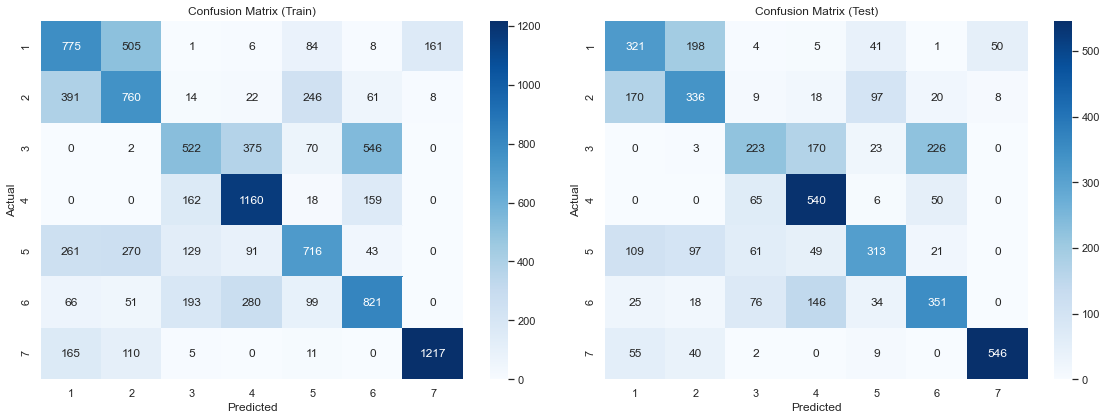

In [124]:
conf_matrix_tst = confusion_matrix(y_test2, pred_test) #test confusion matrix
conf_matrix_tr = confusion_matrix(y_train2, pred_train) #train confusion matrix
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
sns.heatmap(conf_matrix_tr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_train2), 
            yticklabels=np.unique(y_train2))
plt.title('Confusion Matrix (Train)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.subplot(1,2,2)
sns.heatmap(conf_matrix_tst, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test2), 
            yticklabels=np.unique(y_test2))
plt.title('Confusion Matrix (Test)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

You can see the feature importance in this section.

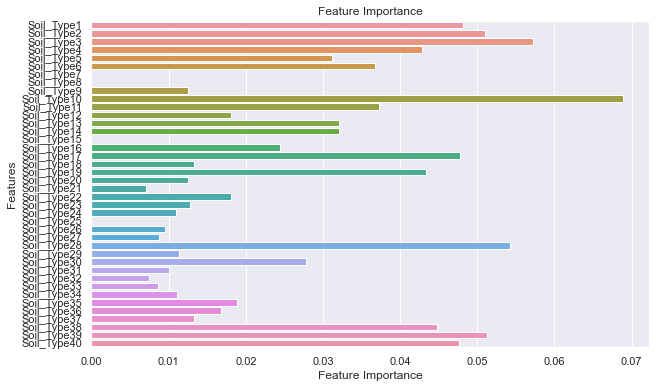

In [125]:
f_imp=model.feature_imp
plt.figure(figsize=(10, 6))
sns.barplot(x=f_imp, y=X_train2.columns, orient="h")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.show()

### c2) Benefiting from the decision tree algorithm, implement random forest  algorithm from scratch and train a model for your problem. Give comments in each line of your algorithm to explain what is this line for. Train a model and present your result on test set. Try to figure out whether there is overfitting or underfitting. Compare your result with c1. Plot feature importance for your model

In [195]:
class RandomForest():
    def __init__(self,n_trees=6,max_depth=10,min_samples_split=2,n_featrue=None):
        self.n_trees=n_trees #number of trees
        self.trees=[] #tree list
        self.max_depth=max_depth #max depth of created trees
        self.min_samples_split=min_samples_split #minimum sample to split
        self.n_features=n_featrue #number of features
    def fit(self,X,y):
        self.trees=[] #empty tree list
        feature_imp=[] #empty feature importance list

        #for loop to create n trees
        for i in range(self.n_trees):
            tree = DesicionTree(max_depth=self.max_depth,min_samples_split=self.min_samples_split) #desicion tree alghoritm from previous question
            self.X_sample,y_sample=self._bootstrap_samples(X,y) #random subset of train data
            tree._fit(self.X_sample,y_sample) #training tree
            self.trees.append(tree) #adding to tree list
            feature_imp.append(tree.feature_imp) #adding to featre importance list
        self.feature_importance=sum(feature_imp)/len(feature_imp) #average of feature importances of trees
    def _bootstrap_samples(self,X,y):
        self.n_samples=X.shape[0] #number of rows
        ids=np.random.choice(self.n_samples,self.n_samples,replace=True) #selecting rows randomly
        self.idxs=ids #indexes
        #get subset using indexes
        X_samples=X[ids] 
        y_samples=y[ids]
        return X_samples,y_samples
    def _most_common_label(self,y):
        counter=Counter(y) #counts of uniqe labels
        most_common=counter.most_common(1)[0][0] #choses the most common label (used to find the most common predicted value by tree set)
        return most_common
    def predict(self,X):
        predictions=np.array([tree.predict(X) for tree in self.trees]) #predicts the labels by shifting down
        tree_pred=np.swapaxes(predictions,0,1)
        predictions=np.array([self._most_common_label(p) for p in tree_pred]) #determine the most common predicted label by tree
        return predictions

    

The random forest algorithm aims to give more accurate results by using trees trained from random subsets based on the desicion tree algorithm, but in this case, we cannot see any extra performance in random forest since the data we have is not enough even for the desicion tree.

Below we see the plot of a large-scale grid search algorithm, but further changing the hyperparameters has no effect on the result.

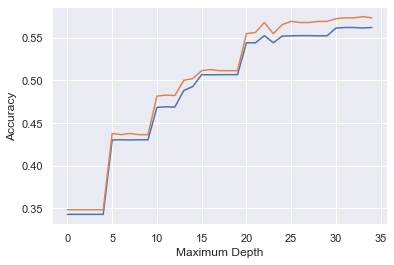

Best Hyperparameters: (25, 15)
Best Score: 0.5747354497354498


In [133]:
param_grid = {
    'max_depth': [3,7,11,13,17,19,25],
    'n_tree':[3,7,11,15,19],
    
}

# all combinations of hyperparameters
param_combinations = list(itertools.product(*param_grid.values()))

#grid search
best_score = float('-inf')
best_params = None
scores=[] #test scores
scores_t=[] #train scores
for params in param_combinations:
    m_d ,n_t= params
    model = RandomForest(n_trees=n_t,max_depth=m_d)
    model.fit(np.array(X_train2), np.array(y_train2))
    pred_train=model.predict(np.array(X_train2))
    pred_test=model.predict(np.array(X_test2))
    score_t = accuracy_score(y_train2,pred_train) 
    scores_t.append(score_t)
    score = accuracy_score(y_test2,pred_test) 
    scores.append(score)
    if score > best_score:
        best_score = score
        best_params = params
plt.plot(scores_t,label='Training Score')
plt.plot(scores,label='Test Score')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.show()
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

Therefore, we cannot see a gap in train and test accuracy values ​​according to increasing model complexity.

### c3) Assume you can add an additional feature to (X_train2, X_test2) from the features in "df" dataframe in the third line of this notebook. All features are listed in df.columns. Define a procedure to choose the feature that will maximize your model's accuracy. Define a procedure to present this feature as a categorical variable and add this discretized single feature into (X_train2, X_test2). Then train models with the developed algorithms in c1 and c2. Compare the obtained results with the results in c1, c2


In addition to soil types, I trained the model using all features except soil type and id using the desicion tree algorithm to find the most suitable feature that can be added to the data set.

In [154]:
filter_col = [col for col in df if col.startswith('Soil_Type')]
X3 = df.drop(filter_col,axis=1)
X3=X3.drop(["Cover_Type","Id"],axis=1)
y3 = df[["Cover_Type"]]
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=42)

In [155]:
dt_m=DesicionTree(max_depth=7)
dt_m._fit(np.array(X_train3),np.array(y_train3))


In [156]:
y_pre=dt_m.predict(np.array(X_train3))
y_pre_te=dt_m.predict(np.array(X_test3))

Out of curiosity, I also looked at the accuracy of the model I trained without the 'soil type' and observed that it gave good results with 0.71 test accuracy on its own.

In [157]:
print("Train Accuracy:",accuracy_score(np.array(y_train3),y_pre))

0.7616213151927438

In [158]:
print("Train Accuracy:",accuracy_score(np.array(y_test3),y_pre_te))

0.7123015873015873

 From the feature importance bar plot, I decided that the most suitable feature would be elevation. to

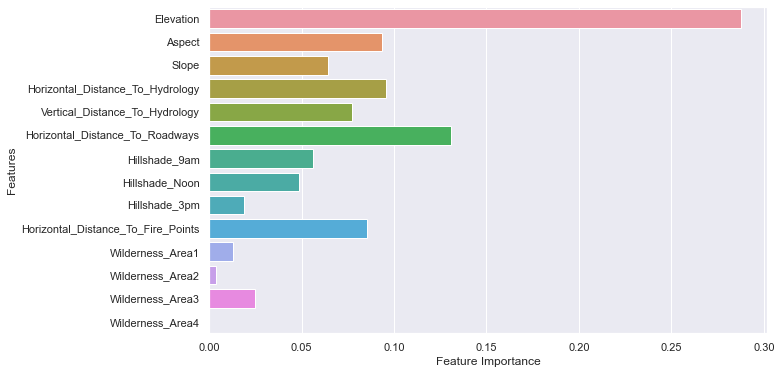

In [159]:
f_imp=dt_m.feature_imp
plt.figure(figsize=(10, 6))
sns.barplot(x=f_imp, y=X_train3.columns, orient="h")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

In [190]:
from sklearn.model_selection import train_test_split

columns_to_keep = [col for col in df if col.startswith('Soil_Type')]
columns_to_keep.append("Elevation")

X3 = df[columns_to_keep]
y3 = df["Cover_Type"]

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=42)


In [196]:
model_last = RandomForest()
model_last.fit(np.array(X_test3), np.array(y_test3))


In [197]:
y_pre=model_last.predict(np.array(X_train3))
y_pre_te=model_last.predict(np.array(X_test3))

In [199]:
print("Train Accuracy:",accuracy_score(np.array(y_test3),y_pre_te))
print("Train Accuracy:",accuracy_score(np.array(y_train3),y_pre))

Train Accuracy: 0.7678571428571429
Train Accuracy: 0.6500377928949358


With the courage I received from the previous feature importance analysis, I trained the model using the elevation feature, but I observed that the gap between train and test accuracy had widened. This showed that my default max depth of 10 would lead me to overfitting.

This result is better than desicion tree and random forest alone, but other features should also be used for the best result.

### Sources

Honest list of resources I use

Bhamare, A. (2020, November 19). Logistic Regression from Scratch (Multi Classification with OneVsAll). Medium. https://medium.com/analytics-vidhya/logistic-regression-from-scratch-multi-classification-with-onevsall-d5c2acf0c37c

bamtak. (n.d.). Multi Class Logistic Regression. GitHub. https://github.com/bamtak/machine-learning-implemetation-python/blob/master/Multi%20Class%20Logistic%20Regression.ipynb

Ereren, B. (n.d.). Implement Linear Regression in Python. Inside Learning Machines. https://insidelearningmachines.com/implement_linear_regression_in_python/

Ereren, B. (n.d.). Build a Logistic Regression Classifier in Python. Inside Learning Machines. https://insidelearningmachines.com/build-a-logistic-regression-classifier-in-python/

AssemblyAI-Examples. (n.d.). LogisticRegression.py. GitHub. https://github.com/AssemblyAI-Examples/Machine-Learning-From-Scratch/blob/main/03%20Logistic%20Regression/LogisticRegression.py

Kenobi, O. (n.d.). Coding Linear Regression from Scratch. Towards Data Science. https://towardsdatascience.com/coding-linear-regression-from-scratch-c42ec079902

Ereren, B. (n.d.). Build a Random Forest in Python. Inside Learning Machines. https://insidelearningmachines.com/build-a-random-forest-in-python/

Oz, E. (2021, March 26). Building a Random Forest Model from Scratch. Medium. https://medium.com/@enozeren/building-a-random-forest-model-from-scratch-81583cbaa7a9

Better Data Science. (n.d.). MML Decision Trees. Better Data Science. https://betterdatascience.com/mml-decision-trees/